In [10]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import jcm_lib as jcm
import matplotlib as mpl

#DEFINIMOS LOS OPERADORES QUE VAMOS A USAR EN LOS CALCULOS
n=tensor(qeye(2),qeye(2),num(3))
sqrtN=tensor(qeye(2),qeye(2),Qobj(np.diag([0,1,np.sqrt(2)])))
n2=tensor(qeye(2),qeye(2),Qobj(np.diag([0,1,4])))
a=tensor(qeye(2),qeye(2),destroy(3))
sm1=tensor(sigmam(),qeye(2),qeye(3))
sp1=tensor(sigmap(),qeye(2),qeye(3))
sz1=tensor(sigmaz(),qeye(2),qeye(3))
sx1=tensor(sigmax(),qeye(2),qeye(3))
sm2=tensor(qeye(2),sigmam(),qeye(3))
sp2=tensor(qeye(2),sigmap(),qeye(3))
sz2=tensor(qeye(2),sigmaz(),qeye(3))
sx2=tensor(qeye(2),sigmax(),qeye(3))

#DEFINIMOS LOS VECTORES DE LA BASE
e=basis(2,0)
gr=basis(2,1)

e0=tensor(e,basis(3,0))
g0=tensor(gr,basis(3,0))
g1=tensor(gr,basis(3,1))
sx=tensor(sigmax(),qeye(3))
sy=tensor(sigmay(),qeye(3))
sz=tensor(sigmaz(),qeye(3))
sp=tensor(sigmap(),qeye(3))
sm=tensor(sigmam(),qeye(3))


ee0=tensor(e,e,basis(3,0)) #0
ee1=tensor(e,e,basis(3,1)) #1
ee2=tensor(e,e,basis(3,2)) #2

eg0=tensor(e,gr,basis(3,0)) #3
ge0=tensor(gr,e,basis(3,0)) #6

eg1=tensor(e,gr,basis(3,1)) #4
ge1=tensor(gr,e,basis(3,1)) #7

eg2=tensor(e,gr,basis(3,2)) #5
ge2=tensor(gr,e,basis(3,2)) #8

gg0=tensor(gr,gr,basis(3,0)) #9
gg1=tensor(gr,gr,basis(3,1)) #10
gg2=tensor(gr,gr,basis(3,2)) #11


SMALL_SIZE = 15
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure.subplot',left=0.1)
plt.rc('figure.subplot',bottom=0.102)
plt.rc('figure.subplot',right=0.962)
plt.rc('figure.subplot',top=0.95)


def beta_n(n_:int,k:float,J:float,x:float):
    return -(x*(n_**2+(n_-1)**2+(n_-2)**2)+J+2*k)

def gamma_n(n_:int,d:float,g:float,k:float,J:float,x:float,a:float=0.5):
    return (x*(n_-1)**2-J+2*k)*(x*(n_-2)**2+x*n_**2+2*J)+(x*(n_-2)**2+d+J)*(x*n_**2-d+J)-2*g**2*(n_**(2*a)+(n_-1)**(2*a))

def eta_n(n_:int,d:float,g:float,k:float,J:float,x:float,a:float=0.5):
    return -(x*n_**2 - d + J)*(x*(n_ - 2)**2 + d + J)*(x*(n_ - 1)**2 - J + 2*k)+ 2*g**2*(x*(n_ - 2)**2*n_**(2*a) + x*n_**2*(n_ - 1)**(2*a) + d* (n_**(2*a) - (n_ - 1)**(2*a)) + J*(n_**(2*a) - (n_ - 1)**(2*a)))

def Q_n(n_:int,d:float,g:float,k:float,J:float,x:float):
    return gamma_n(n_,d,g,k,J,x)/3-beta_n(n_,k,J,x)*beta_n(n_,k,J,x)/9

def R_n(n_:int,d:float,g:float,k:float,J:float,x:float):
    return 1/54*(9*beta_n(n_,k,J,x)*gamma_n(n_,d,g,k,J,x)-27*eta_n(n_,d,g,k,J,x)-2*beta_n(n_,k,J,x)*beta_n(n_,k,J,x)*beta_n(n_,k,J,x))

def theta_n(n_:int,d:float,g:float,k:float,J:float,x:float):
    return np.arccos(R_n(n_,d,g,k,J,x)/np.sqrt(-Q_n(n_,d,g,k,J,x)**3))

def omega_general(n_:int,j:int,d:float,g:float,k:float,J:float,x:float):
    return 2*np.sqrt(-2*Q_n(n_,d,g,k,J,x))*np.cos((theta_n(n_,d,g,k,J,x)+2*(j-1)*np.pi)/3)

def energiasn1(j,g,d,x,k,J):
    if j==1: return (x-d)/2+k+np.sqrt(2*g**2+(k-J+(d-x)/2)**2)
    elif j==2: return (x-d)/2+k-np.sqrt(2*g**2+(k-J+(d-x)/2)**2)
    elif j==3: return -2*k-J
    else: 
        print('valor inesperado de j')
        exit()

DEPENDENCIA CON EL REGIMEN DE ACOPLAMIENTO

<>:129: SyntaxWarning: invalid escape sequence '\p'
<>:131: SyntaxWarning: invalid escape sequence '\p'
<>:129: SyntaxWarning: invalid escape sequence '\p'
<>:131: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_9340\3956061510.py:129: SyntaxWarning: invalid escape sequence '\p'
  ax1_fg.set_ylabel('$\phi/\pi$',size=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_9340\3956061510.py:131: SyntaxWarning: invalid escape sequence '\p'
  ax2_fg.set_ylabel('$\phi/\pi$',size=20)
c:\Users\juego\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\juego\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, '$t/T$')

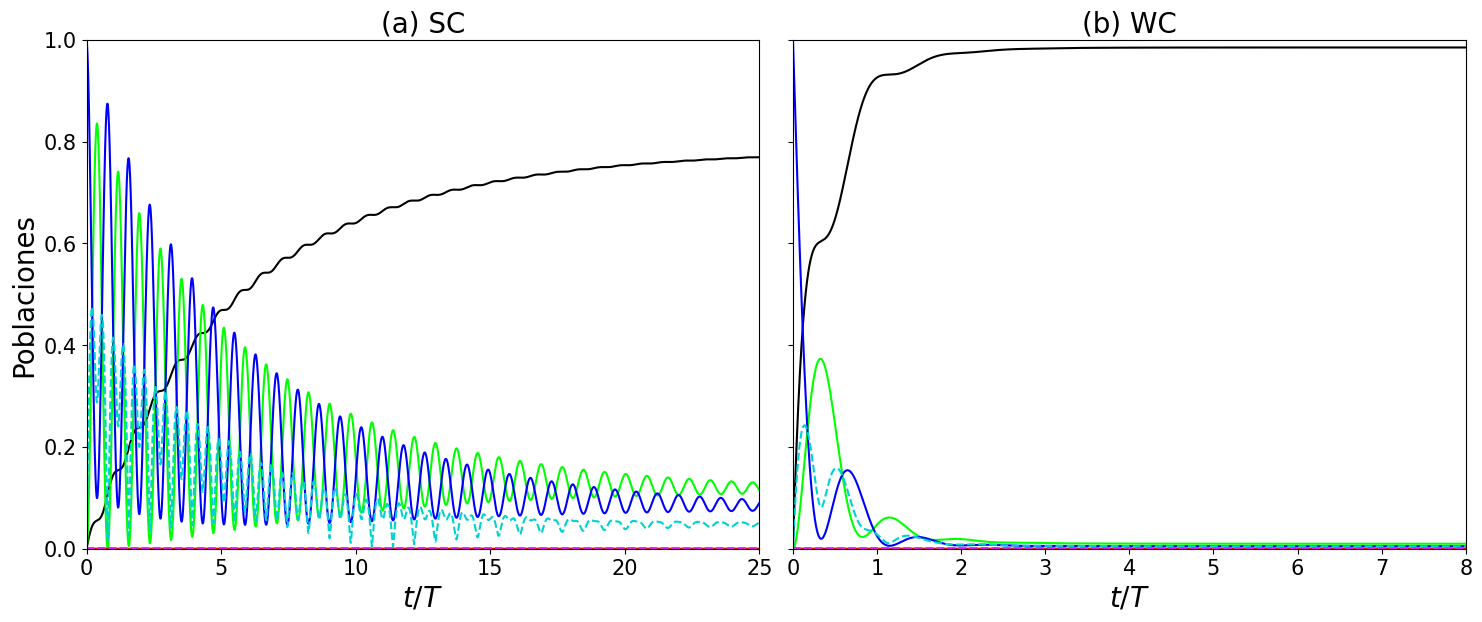

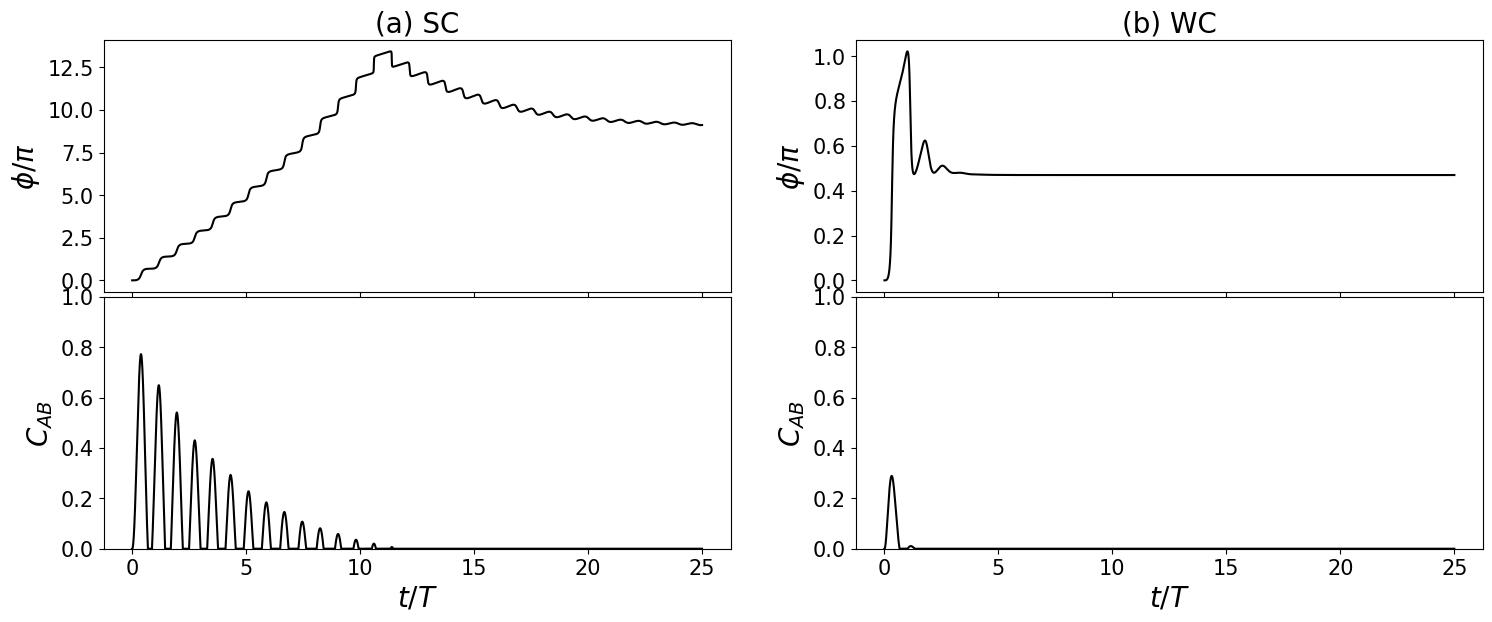

In [14]:
alpha=1

w0=1
g=0.001*w0

p=0.005*g

x=0#1*g
d=0.000001*g#.5*g

k=0.5*g
J=0#.5*g


psi0=(gg1).unit()  #gg1#(tensor(tensor(e,gr)+tensor(gr,gr),basis(3,0)+basis(3,1))).unit()#1/10*(gg0*gg0.dag()+(eg0+ge0).unit()*(eg0+ge0).unit().dag()+(eg0-ge0).unit()*(eg0-ge0).unit().dag()+gg1*gg1.dag()+ee0*ee0.dag()+(eg1+ge1).unit()*(eg1+ge1).unit().dag()+(eg1-ge1).unit()*(eg1-ge1).unit().dag()+gg2*gg2.dag()+(eg2+ge2).unit()*(eg2+ge2).unit().dag()+(eg2-ge2).unit()*(eg2-ge2).unit().dag())
psi0Name='gg1'
prefijo=f'd={d/g} x={x/g} k={k/g} J={J/g}'

steps=80000

# T=2*np.pi/energiasn1(1,g,d,x,k,J)
# T=2*np.pi/(omega_general(1,1,d,g,k,J,x))
# T=2*np.pi/(-beta_n(1,k,J,x)/3+omega_general(1,1,d,g,k,J,x))
# print(T)
T=2*np.pi/omega_general(1,1,d,g,k,J,x)

# print(omega_general(1,2,d,g,k,J,x))
t_final=25*T

acoplamiento='lineal'
def f():
    if acoplamiento=='lineal':
        return 1
    elif acoplamiento=='bs':
        return sqrtN

def pr(estado):
    return estado.unit()*estado.unit().dag()

fig=plt.figure(figsize=(16,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
fig.subplots_adjust(wspace=0.05)

ax=[ax1,ax2]
ax1.set_xlabel('$t/T$',size=20)
ax2.set_xlabel('$t/T$',size=20)
ax1.set_ylabel('Poblaciones',size=20)
ax2.set_yticklabels([])

# esfera1=Bloch()
# esfera1.make_sphere()
# esfera1.clear()

# esfera2=Bloch()
# esfera2.make_sphere()
# esfera2.clear()

# esferas=[esfera1,esfera2]

fig_fg=plt.figure(figsize=(16,6))
ax1_fg=fig_fg.add_subplot(221)
ax2_fg=fig_fg.add_subplot(222)
ax1_concu=fig_fg.add_subplot(223)
ax2_concu=fig_fg.add_subplot(224)
ax_fg=[ax1_fg,ax2_fg]
ax_concu=[ax1_concu,ax2_concu]
colors=mpl.colormaps['plasma'](np.linspace(0,1,5))

for j,gamma in enumerate([0.1*g,2*g]):
    '''##########---Hamiltoniano---##########'''

    H=x*n2 + d/2*(sz1+alpha*sz2) + g*((sm1+alpha*sm2)*f()*a.dag()+(sp1+alpha*sp2)*a*f()) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2

    '''#######---Simulacion numerica---#######'''
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*(sp1+alpha*sp2)] #OPERADORES DE COLAPSO

    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    atoms_states_d=np.empty_like(sol_d.states)
    for i in range(len(sol_d.states)):
        atoms_states_d[i]=sol_d.states[i].ptrace([0,1])  
    concu=jcm.concurrence(atoms_states_d)
    # prob_g0=[expect(sol_d.states[i],g0*g0.dag()) for i in range(len(sol_d.states))]
    # prob_g1=[expect(sol_d.states[i],g1*g1.dag()) for i in range(len(sol_d.states))]
    # prob_e0=[expect(sol_d.states[i],e0*e0.dag()) for i in range(len(sol_d.states))]

    # # print(sol_d.states[1])
    # expect_sz=[expect(sol_d.states[i],sz) for i in range(len(sol_d.states))]
    # expect_sx=[expect(sol_d.states[i],sx) for i in range(len(sol_d.states))]
    # expect_sy=[expect(sol_d.states[i],sy) for i in range(len(sol_d.states))]
    # # vec=[[expect(sol_d.states[i],sz),expect(sol_d.states[i],sz),expect(sol_d.states[i],sz)] for i in range(len(sol_d.states))]
    # vec=[expect_sx,expect_sy,expect_sz]
    fg_d,arg,eigenvals_t_d = jcm.fases(sol_d)
    ax_fg[j].plot(t/T,fg_d/np.pi,color='black')
    ax_concu[j].plot(t/T,concu,color='black')
    # ax[j].plot(t/T,prob_g0,color='blue')
    ax[j].plot(t/T,[np.abs(sol_d.states[i][9][9]) for i in range(steps)],color='black',label='gg0') #gg0

    ax[j].plot(t/T,[sol_d.states[i][3][3]/2+sol_d.states[i][6][6]/2+np.real(sol_d.states[i][3][6]) for i in range(steps)],color=(0, 255/255, 0),label='eg0+') #eg0+ge0
    ax[j].plot(t/T,[sol_d.states[i][3][3]/2+sol_d.states[i][6][6]/2-np.real(sol_d.states[i][3][6]) for i in range(steps)],color=(255/255, 0, 0),label='eg0-') #eg0-ge0
    ax[j].plot(t/T,[sol_d.states[i][10][10] for i in range(steps)],color=(0, 0, 255/255),label='gg1') #gg1

    ax[j].plot(t/T,[np.abs(sol_d.states[i][3][9]+sol_d.states[i][6][9])/np.sqrt(2) for i in range(steps)],linestyle='dashed',color=(28/255, 176/255, 28/255)) #Coherenencia gg0/eg0+ge0
    ax[j].plot(t/T,[np.abs(sol_d.states[i][3][9]-sol_d.states[i][6][9])/np.sqrt(2) for i in range(steps)],linestyle='dashed',color=(186/255, 23/255, 23/255)) #Coherenencia gg0/eg0-ge0

    ax[j].plot(t/T,[np.abs(sol_d.states[i][9][10]) for i in range(steps)],linestyle='dashed',color=(0, 0, 170/255))

    ax[j].plot(t/T,[0.5*(sol_d.states[i][3][3]-2*np.imag(sol_d.states[i][3][6])-sol_d.states[i][6][6]) for i in range(steps)],linestyle='dashed',color=(255/255, 209/255, 0)) #Coherencia eg0+/eg0-

    ax[j].plot(t/T,[np.abs(sol_d.states[i][3][10]+sol_d.states[i][3][10])/np.sqrt(2) for i in range(steps)],linestyle='dashed',color=(0, 209/255, 210/255)) #Coherenencia gg1/eg0-ge0
    ax[j].plot(t/T,[np.abs(sol_d.states[i][3][10]-sol_d.states[i][3][10])/np.sqrt(2) for i in range(steps)],linestyle='dashed',color=(235/255, 18/255, 235/255)) #Coherenencia gg1/eg0-ge0
    
    # ax[j].plot(t/T,prob_g1,color='red')
    # ax[j].plot(t/T,prob_e0,color='green')
    # esferas[j].add_points(vec)
    # plt.plot(t/T,fg_d/np.pi)
ax1.set_xlim(0,25)
ax2.set_xlim(0,8)
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax1.set_title('(a) SC',size=20)
ax2.set_title('(b) WC',size=20)
ax1_concu.set_ylim(0,1)
ax2_concu.set_ylim(0,1)
ax1_fg.set_title('(a) SC',size=20)
ax2_fg.set_title('(b) WC',size=20)
ax1_fg.set_ylabel('$\phi/\pi$',size=20)
ax1_concu.set_ylabel('$C_{AB}$',size=20)
ax2_fg.set_ylabel('$\phi/\pi$',size=20)
ax2_concu.set_ylabel('$C_{AB}$',size=20)
ax1_concu.set_xlabel('$t/T$',size=20)
ax2_concu.set_xlabel('$t/T$',size=20)
# esfera1.render()
# esfera1.show()
# esfera2.render()
# esfera2.show()

<>:127: SyntaxWarning: invalid escape sequence '\p'
<>:129: SyntaxWarning: invalid escape sequence '\p'
<>:127: SyntaxWarning: invalid escape sequence '\p'
<>:129: SyntaxWarning: invalid escape sequence '\p'
C:\Users\juego\AppData\Local\Temp\ipykernel_9340\998633606.py:127: SyntaxWarning: invalid escape sequence '\p'
  ax1_fg.set_ylabel('$\phi/\pi$',size=20)
C:\Users\juego\AppData\Local\Temp\ipykernel_9340\998633606.py:129: SyntaxWarning: invalid escape sequence '\p'
  ax2_fg.set_ylabel('$\phi/\pi$',size=20)
c:\Users\juego\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\juego\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, '$t/T$')

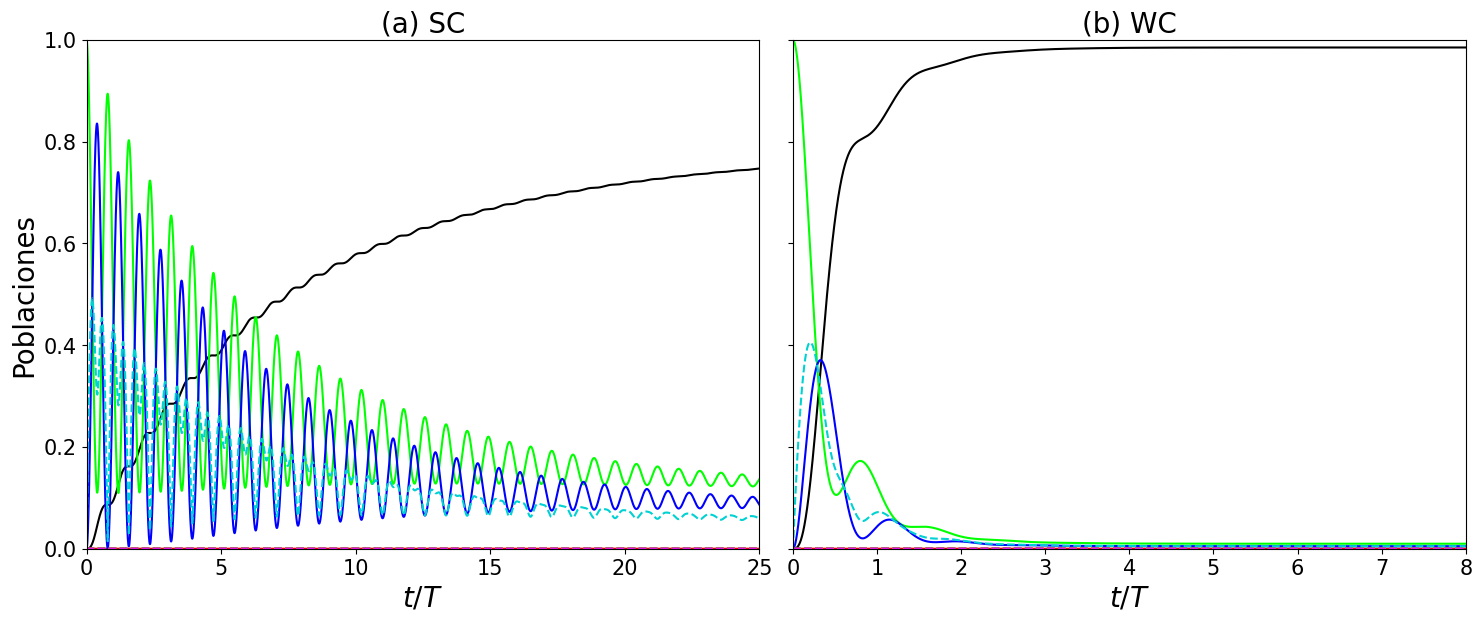

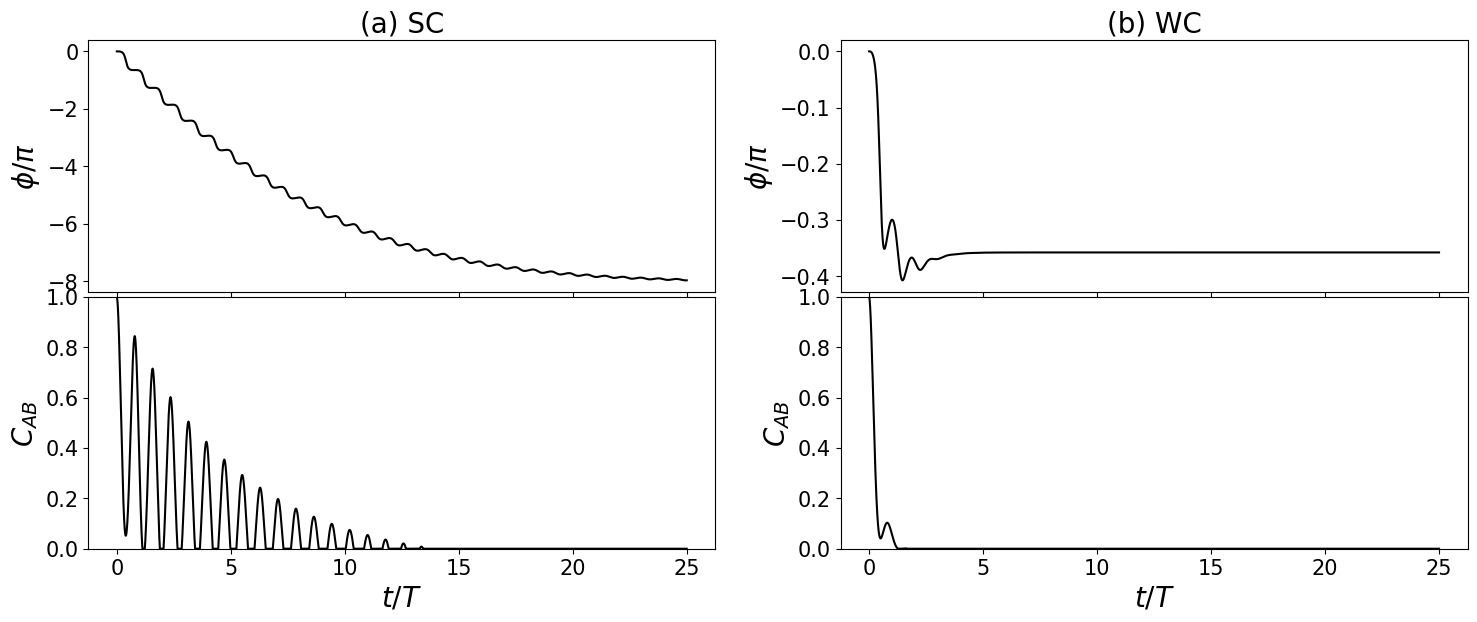

In [15]:
alpha=1

w0=1
g=0.001*w0

p=0.005*g

x=0#1*g
d=0.000001*g#.5*g

k=0.5*g
J=0#.5*g


psi0=(eg0+ge0).unit()  #gg1#(tensor(tensor(e,gr)+tensor(gr,gr),basis(3,0)+basis(3,1))).unit()#1/10*(gg0*gg0.dag()+(eg0+ge0).unit()*(eg0+ge0).unit().dag()+(eg0-ge0).unit()*(eg0-ge0).unit().dag()+gg1*gg1.dag()+ee0*ee0.dag()+(eg1+ge1).unit()*(eg1+ge1).unit().dag()+(eg1-ge1).unit()*(eg1-ge1).unit().dag()+gg2*gg2.dag()+(eg2+ge2).unit()*(eg2+ge2).unit().dag()+(eg2-ge2).unit()*(eg2-ge2).unit().dag())

steps=80000

# T=2*np.pi/energiasn1(1,g,d,x,k,J)
# T=2*np.pi/(omega_general(1,1,d,g,k,J,x))
# T=2*np.pi/(-beta_n(1,k,J,x)/3+omega_general(1,1,d,g,k,J,x))
# print(T)
T=2*np.pi/omega_general(1,1,d,g,k,J,x)

# print(omega_general(1,2,d,g,k,J,x))
t_final=25*T

acoplamiento='lineal'
def f():
    if acoplamiento=='lineal':
        return 1
    elif acoplamiento=='bs':
        return sqrtN

def pr(estado):
    return estado.unit()*estado.unit().dag()

fig=plt.figure(figsize=(16,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
fig.subplots_adjust(wspace=0.05)

ax=[ax1,ax2]
ax1.set_xlabel('$t/T$',size=20)
ax2.set_xlabel('$t/T$',size=20)
ax1.set_ylabel('Poblaciones',size=20)
ax2.set_yticklabels([])

# esfera1=Bloch()
# esfera1.make_sphere()
# esfera1.clear()

# esfera2=Bloch()
# esfera2.make_sphere()
# esfera2.clear()

# esferas=[esfera1,esfera2]

fig_fg=plt.figure(figsize=(16,6))
ax1_fg=fig_fg.add_subplot(221)
ax2_fg=fig_fg.add_subplot(222)
ax1_concu=fig_fg.add_subplot(223)
ax2_concu=fig_fg.add_subplot(224)
ax_fg=[ax1_fg,ax2_fg]
ax_concu=[ax1_concu,ax2_concu]
colors=mpl.colormaps['plasma'](np.linspace(0,1,5))

for j,gamma in enumerate([0.1*g,2*g]):
    '''##########---Hamiltoniano---##########'''

    H=x*n2 + d/2*(sz1+alpha*sz2) + g*((sm1+alpha*sm2)*f()*a.dag()+(sp1+alpha*sp2)*a*f()) + 2*k*(sm1*sp2+sp1*sm2) + J*sz1*sz2

    '''#######---Simulacion numerica---#######'''
    l_ops=[np.sqrt(gamma)*a,np.sqrt(p)*(sp1+alpha*sp2)] #OPERADORES DE COLAPSO

    t=np.linspace(0,t_final,steps) #TIEMPO DE LA SIMULACION 

    sol_d=mesolve(H,psi0,t,c_ops=l_ops)
    atoms_states_d=np.empty_like(sol_d.states)
    for i in range(len(sol_d.states)):
        atoms_states_d[i]=sol_d.states[i].ptrace([0,1])  
    concu=jcm.concurrence(atoms_states_d)
    # prob_g0=[expect(sol_d.states[i],g0*g0.dag()) for i in range(len(sol_d.states))]
    # prob_g1=[expect(sol_d.states[i],g1*g1.dag()) for i in range(len(sol_d.states))]
    # prob_e0=[expect(sol_d.states[i],e0*e0.dag()) for i in range(len(sol_d.states))]

    # # print(sol_d.states[1])
    # expect_sz=[expect(sol_d.states[i],sz) for i in range(len(sol_d.states))]
    # expect_sx=[expect(sol_d.states[i],sx) for i in range(len(sol_d.states))]
    # expect_sy=[expect(sol_d.states[i],sy) for i in range(len(sol_d.states))]
    # # vec=[[expect(sol_d.states[i],sz),expect(sol_d.states[i],sz),expect(sol_d.states[i],sz)] for i in range(len(sol_d.states))]
    # vec=[expect_sx,expect_sy,expect_sz]
    fg_d,arg,eigenvals_t_d = jcm.fases(sol_d)
    ax_fg[j].plot(t/T,fg_d/np.pi,color='black')
    ax_concu[j].plot(t/T,concu,color='black')
    # ax[j].plot(t/T,prob_g0,color='blue')
    ax[j].plot(t/T,[np.abs(sol_d.states[i][9][9]) for i in range(steps)],color='black',label='gg0') #gg0

    ax[j].plot(t/T,[sol_d.states[i][3][3]/2+sol_d.states[i][6][6]/2+np.real(sol_d.states[i][3][6]) for i in range(steps)],color=(0, 255/255, 0),label='eg0+') #eg0+ge0
    ax[j].plot(t/T,[sol_d.states[i][3][3]/2+sol_d.states[i][6][6]/2-np.real(sol_d.states[i][3][6]) for i in range(steps)],color=(255/255, 0, 0),label='eg0-') #eg0-ge0
    ax[j].plot(t/T,[sol_d.states[i][10][10] for i in range(steps)],color=(0, 0, 255/255),label='gg1') #gg1

    ax[j].plot(t/T,[np.abs(sol_d.states[i][3][9]+sol_d.states[i][6][9])/np.sqrt(2) for i in range(steps)],linestyle='dashed',color=(28/255, 176/255, 28/255)) #Coherenencia gg0/eg0+ge0
    ax[j].plot(t/T,[np.abs(sol_d.states[i][3][9]-sol_d.states[i][6][9])/np.sqrt(2) for i in range(steps)],linestyle='dashed',color=(186/255, 23/255, 23/255)) #Coherenencia gg0/eg0-ge0

    ax[j].plot(t/T,[np.abs(sol_d.states[i][9][10]) for i in range(steps)],linestyle='dashed',color=(0, 0, 170/255))

    ax[j].plot(t/T,[0.5*(sol_d.states[i][3][3]-2*np.imag(sol_d.states[i][3][6])-sol_d.states[i][6][6]) for i in range(steps)],linestyle='dashed',color=(255/255, 209/255, 0)) #Coherencia eg0+/eg0-

    ax[j].plot(t/T,[np.abs(sol_d.states[i][3][10]+sol_d.states[i][3][10])/np.sqrt(2) for i in range(steps)],linestyle='dashed',color=(0, 209/255, 210/255)) #Coherenencia gg1/eg0-ge0
    ax[j].plot(t/T,[np.abs(sol_d.states[i][3][10]-sol_d.states[i][3][10])/np.sqrt(2) for i in range(steps)],linestyle='dashed',color=(235/255, 18/255, 235/255)) #Coherenencia gg1/eg0-ge0
    
    # ax[j].plot(t/T,prob_g1,color='red')
    # ax[j].plot(t/T,prob_e0,color='green')
    # esferas[j].add_points(vec)
    # plt.plot(t/T,fg_d/np.pi)
ax1.set_xlim(0,25)
ax2.set_xlim(0,8)
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
ax1.set_title('(a) SC',size=20)
ax2.set_title('(b) WC',size=20)
ax1_concu.set_ylim(0,1)
ax2_concu.set_ylim(0,1)
ax1_fg.set_title('(a) SC',size=20)
ax2_fg.set_title('(b) WC',size=20)
ax1_fg.set_ylabel('$\phi/\pi$',size=20)
ax1_concu.set_ylabel('$C_{AB}$',size=20)
ax2_fg.set_ylabel('$\phi/\pi$',size=20)
ax2_concu.set_ylabel('$C_{AB}$',size=20)
ax1_concu.set_xlabel('$t/T$',size=20)
ax2_concu.set_xlabel('$t/T$',size=20)
# esfera1.render()
# esfera1.show()
# esfera2.render()
# esfera2.show()